In [259]:
import csv, collections, re, math, numpy as np, matplotlib.pyplot as plt

# Binary Town Naive Bayes Classifier  

Consider a town that contains only kids and adults. Each person in this town is associated with two attributes, height and weight that take on values from $\mathbb{R}$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Let $X$ be the random variable denoting a pair of height-weight values and $Y$ be the random variable denoting a person in this town. Let $X_1$ and $X_2$ denote the random variables that take as values $x_1$ and $x_2$ when $X=(x_1,x_2)$.  Assume that $Y$ is a binary random variable that takes on values $kid=0$ or $adult=1$ depending on whether the person is a kid or an adult. The probability that a random person in this town is a kid is given by $P(Y=kid)=pKid$ and the probability that a random person in this town is an adult is given by $P(Y=adult)=pAdult=1-pKid$.

The conditional probability of height and weight given that a person is a kid or adult is given as follows. For $x=(x_1,x_2) \in \mathbb{R}^2$ with $x_1$ denoting the height and $x_2$ denoting the weight,

*   $P(X_1=x_1 ~|~ Y=kid)=f_{\mu_{11},\sigma_{11}}(x_1)$ and $P(X_2=x_2 ~|~ Y=kid)=f_{\mu_{12},\sigma_{12}}(x_2)$
*   $P(X_1=x_1 ~|~ Y=adult)=f_{\mu_{21},\sigma_{21}}(x_1)$ and $P(X_2=x_2 ~|~ Y=adult)=f_{\mu_{22},\sigma_{22}}(x_2)$
 
where $f_{\mu,\sigma}(z)=\frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{1}{2} \left( \frac{z-\mu}{\sigma} \right)^2}$. As height and weight are conditionally independent given the category, it follows that $P(X=x ~|~ Y=kid)=f_{\mu_{11},\sigma_{11}}(x_1) f_{\mu_{12},\sigma_{12}}(x_2)$ and $P(X=x ~|~ Y=adult)=f_{\mu_{21},\sigma_{21}}(x_1) f_{\mu_{22},\sigma_{22}}(x_2)$.


In [260]:

class Kid:
  def __init__(self, i: int, height: float, weight: float = 0) -> None:
    self.kid_name = i
    self.kid_height = height
    self.kid_weight = weight
  def __lt__(self, other):
    return True
  def __gt__(self, other):
    return True


class Adult:
  def __init__(self,i: int, height: int, weight: float = 0) -> None:
    self.adult_name = i
    self.adult_height = height
    self.adult_weight = weight
  def __lt__(self, other):
    return True
  def __gt__(self, other):
    return True


In [261]:
pKid = 0.3

def kid_or_adult_Y(pKid):
  return 0 if np.random.random() < pKid else 1

def random_Y(pKid):
  return 'adult' if kid_or_adult_Y(pKid) else 'kid'

# kid_or_adult_Y(pKid)


In [262]:
def gaussian(mean:float , sd: float):
  return np.random.normal(loc=mean, scale=sd)

In [263]:


# 11
mu_height_given_kid = 2.7
sd_height_given_kid = 1
var_height_given_kid = sd_height_given_kid**2

height_given_kid_mu_sd_tuple = (mu_height_given_kid,sd_height_given_kid)

# 21
mu_height_given_adult = 5
sd_height_given_adult = 1
var_height_given_adult = sd_height_given_adult**2
height_given_adult_mu_sd_tuple = (mu_height_given_adult,sd_height_given_adult)

# 12
mu_weight_given_kid = 20
sd_weight_given_kid = 10
var_weight_given_kid = sd_weight_given_kid**2
weight_given_kid_mu_sd_tuple = (mu_weight_given_kid,sd_weight_given_kid)

# 22
mu_weight_given_adult = 43
sd_weight_given_adult = 10
var_weight_given_adult = sd_weight_given_adult**2
weight_given_adult_mu_sd_tuple = (mu_weight_given_adult,sd_weight_given_adult)



(a) Simulate 1000 people in this town assuming $pKid=.3$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.7,\mu_{12}=20,\mu_{21}=5,\mu_{22}=43$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the bar chart of the valid samples, the histogram of heights across the groups, the histogram of weights across the groups and the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 

In [264]:
def simulate_people_gaussian(
    n: int, 
    height_given_kid_mu_sd_tuple: tuple,
    height_given_adult_mu_sd_tuple: tuple,
    weight_given_kid_mu_sd_tuple: tuple,
    weight_given_adult_mu_sd_tuple: tuple,
    pKid: float
  ):
  # 11
  mu_height_given_kid = height_given_kid_mu_sd_tuple[0]
  sd_height_given_kid = height_given_kid_mu_sd_tuple[1]
  # var_height_given_kid = sd_height_given_kid**2


  # 21
  mu_height_given_adult = height_given_adult_mu_sd_tuple[0]
  sd_height_given_adult = height_given_adult_mu_sd_tuple[1]
  # var_height_given_adult = sd_height_given_adult**2

  # 12
  mu_weight_given_kid = weight_given_kid_mu_sd_tuple[0]
  sd_weight_given_kid = weight_given_kid_mu_sd_tuple[1]
  # var_weight_given_kid = sd_weight_given_kid**2

  # 22
  mu_weight_given_adult = weight_given_adult_mu_sd_tuple[0]
  sd_weight_given_adult = weight_given_adult_mu_sd_tuple[1]
  # var_weight_given_adult = sd_weight_given_adult**2
  # returns kid list and adult list

  kid_list = []
  adult_list = []
  people_name_height_weight = []
  # tuple containing (name, height, weight)
  for i in range(n):
    # kid_or_adult = rnd.choices(['kid','adult'], weights=[pKid,1-pKid], k=1)[0]
    kid_or_adult = np.random.choice(['kid','adult'], p=[pKid,1-pKid],)
    if kid_or_adult == 'kid':
      height_kid_positive = gaussian(mu_height_given_kid,sd_height_given_kid)
      while height_kid_positive < 0:
        height_kid_positive = gaussian(mu_height_given_kid,sd_height_given_kid)
      weight_kid_positive = gaussian(mu_weight_given_kid,sd_weight_given_kid)
      while weight_kid_positive < 0:
        weight_kid_positive = gaussian(mu_weight_given_kid,sd_weight_given_kid)

      kid_list.append(Kid(i,height_kid_positive, weight_kid_positive))
      people_name_height_weight.append(
        (i,height_kid_positive,weight_kid_positive)
      )
    else:
      height_adult_positive = gaussian(mu_height_given_adult,sd_height_given_adult)
      while height_adult_positive < 0:
        height_adult_positive = gaussian(mu_height_given_adult,sd_height_given_adult)
      weight_adult_positive = gaussian(mu_weight_given_adult,sd_weight_given_adult)
      while weight_adult_positive < 0:
        weight_adult_positive = gaussian(mu_weight_given_adult,sd_weight_given_adult)

      adult_list.append(Adult(i,height_adult_positive, weight_adult_positive))
      people_name_height_weight.append(
        (i,height_adult_positive,weight_adult_positive)
      )
    
  return kid_list, adult_list, people_name_height_weight



In [265]:
total_population = 1000

In [266]:
kid_objects_gaussian, adult_objects_gaussian, people_in_town_gaussian = simulate_people_gaussian(
  total_population,
  height_given_kid_mu_sd_tuple,
  height_given_adult_mu_sd_tuple ,
  weight_given_kid_mu_sd_tuple ,
  weight_given_adult_mu_sd_tuple,
  pKid=0.4
)

In [267]:
kid_names = [
  isinstance(kid, Kid) and kid.kid_name for kid in kid_objects_gaussian
]

heights_of_kid_gaussian = [
  isinstance(kid, Kid) and kid.kid_height for kid in kid_objects_gaussian
]
weights_of_kid_gaussian = [
  isinstance(kid, Kid) and kid.kid_weight for kid in kid_objects_gaussian
]

adult_names = [
  isinstance(adult, Adult) and adult.adult_name for adult in adult_objects_gaussian
]

heights_of_adult_gaussian = [
  isinstance(adult, Adult) and adult.adult_height for adult in adult_objects_gaussian
]
weights_of_adult_gaussian = [
  isinstance(adult, Adult) and adult.adult_weight for adult in adult_objects_gaussian
]


In [268]:
# plt.figure(figsize=(20,10))
# # plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# # plt.bar(heights_of_kid_gaussian)
# # plt.legend(loc = 'upper right')
# # plt.xticks(np.arange[0,])

# # plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(kid_names, heights_of_kid_gaussian, color = 'blue', alpha = 0.5)
# # plt.bar(kid_names, weights_of_kid_gaussian, color = 'green')

# # plt.title('Person vs ')
# # plt.title('Histogram of Heights')
# plt.xlabel('Person')
# plt.ylabel('Height')
# plt.show()

In [269]:
# plt.figure(figsize=(20,10))
# # plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# # plt.bar(heights_of_kid_gaussian)
# # plt.legend(loc = 'upper right')
# # plt.xticks(np.arange[0,])

# # plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(kid_names, weights_of_kid_gaussian, color = 'blue', alpha = 0.5)
# # plt.bar(kid_names, weights_of_kid_gaussian, color = 'green')
# # plt.bar(adult_names, weights_of_adult_gaussian, color = 'green')

# # plt.title('Histogram of Heights')
# plt.xlabel('Person')
# plt.ylabel('Weights')
# plt.show()

In [270]:
# plt.figure(figsize=(20,10))
# # plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# # plt.bar(heights_of_kid_gaussian)
# # plt.legend(loc = 'upper right')
# # plt.xticks(np.arange[0,])

# # plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(adult_names, heights_of_adult_gaussian, color = 'blue')
# # plt.bar(kid_names, weights_of_kid_gaussian, color = 'green')


# # plt.title('Histogram of Heights')
# plt.xlabel('Person')
# plt.ylabel('Heights')
# plt.show()

In [271]:
# plt.figure(figsize=(20,10))
# # plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# # plt.bar(heights_of_kid_gaussian)
# # plt.legend(loc = 'upper right')
# # plt.xticks(np.arange[0,])

# # plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(adult_names, weights_of_adult_gaussian, color = 'blue')
# # plt.bar(kid_names, weights_of_kid_gaussian, color = 'green')


# # plt.title('Histogram of Heights')
# plt.xlabel('Weights')
# plt.ylabel('Frequency')
# plt.show()

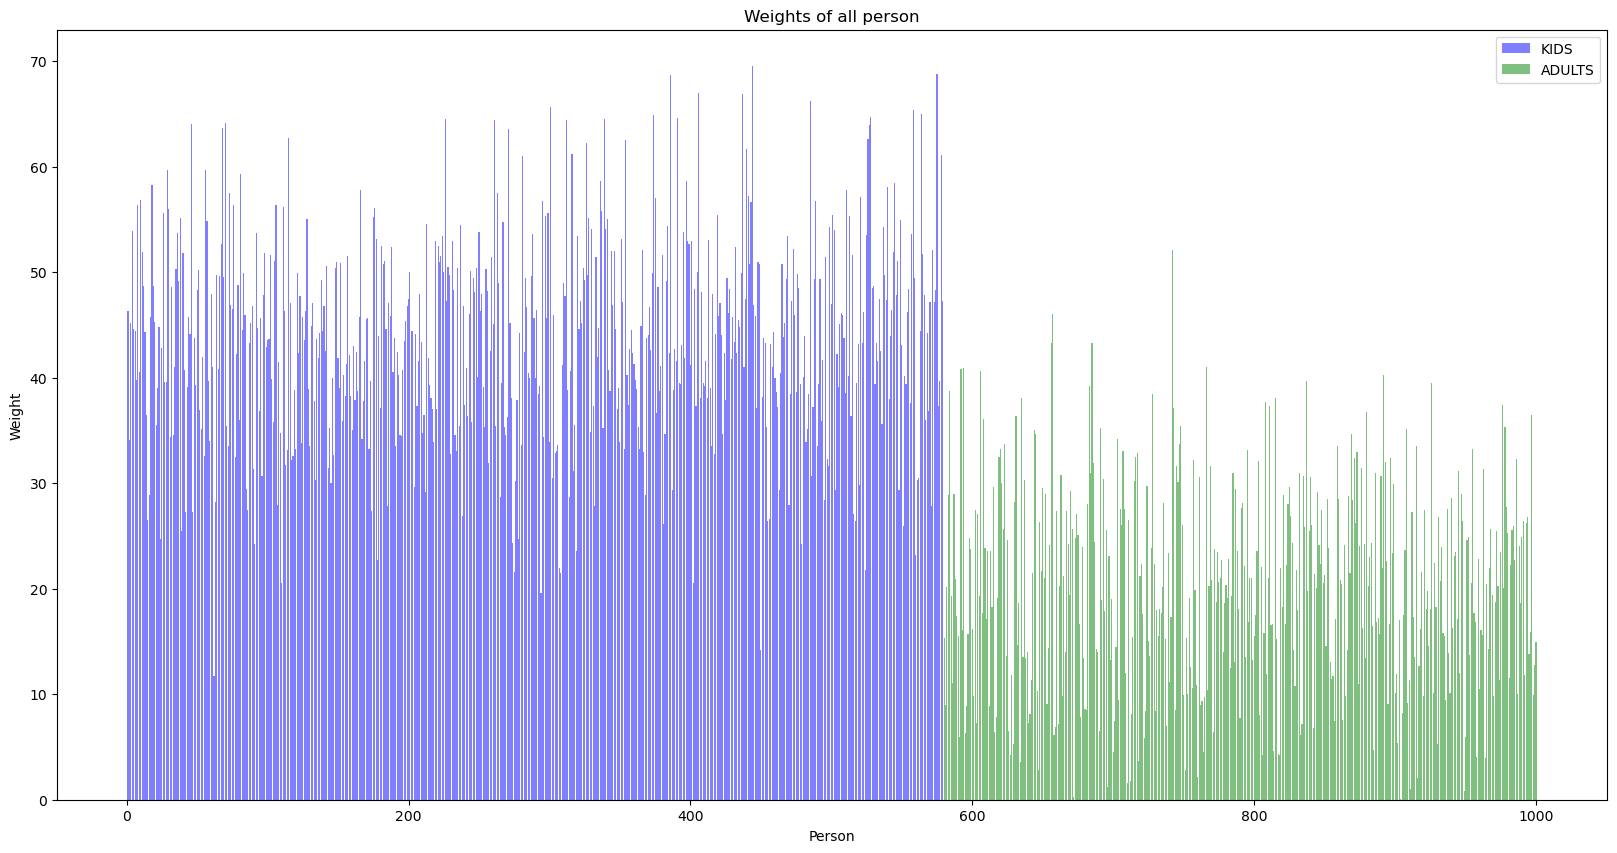

In [272]:
plt.figure(figsize=(20,10))
# plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# plt.bar(heights_of_kid_gaussian)
# plt.legend(loc = 'upper right')
# plt.xticks(np.arange[0,])


# bar chart of names vs weight
# plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(adult_names, weights_of_adult_gaussian, color = 'blue', label = 'KIDS', alpha = 0.5)
# plt.bar(kid_names, weights_of_kid_gaussian, color = 'green', label = 'ADULTS', alpha = 0.5)

plt.bar([
  i+1 for i in range(len(weights_of_adult_gaussian))
], weights_of_adult_gaussian, color = 'blue', label = 'KIDS', alpha = 0.5
)
plt.bar([
  i+1 for i in range(len(weights_of_adult_gaussian), len(weights_of_kid_gaussian)+len(weights_of_adult_gaussian))
], weights_of_kid_gaussian, color = 'green', label = 'ADULTS', alpha = 0.5
)

plt.legend(loc = 'upper right')

# plt.title('Histogram of Heights')
plt.xlabel('Person')
plt.ylabel('Weight')
plt.title('Weights of all person')
plt.show()

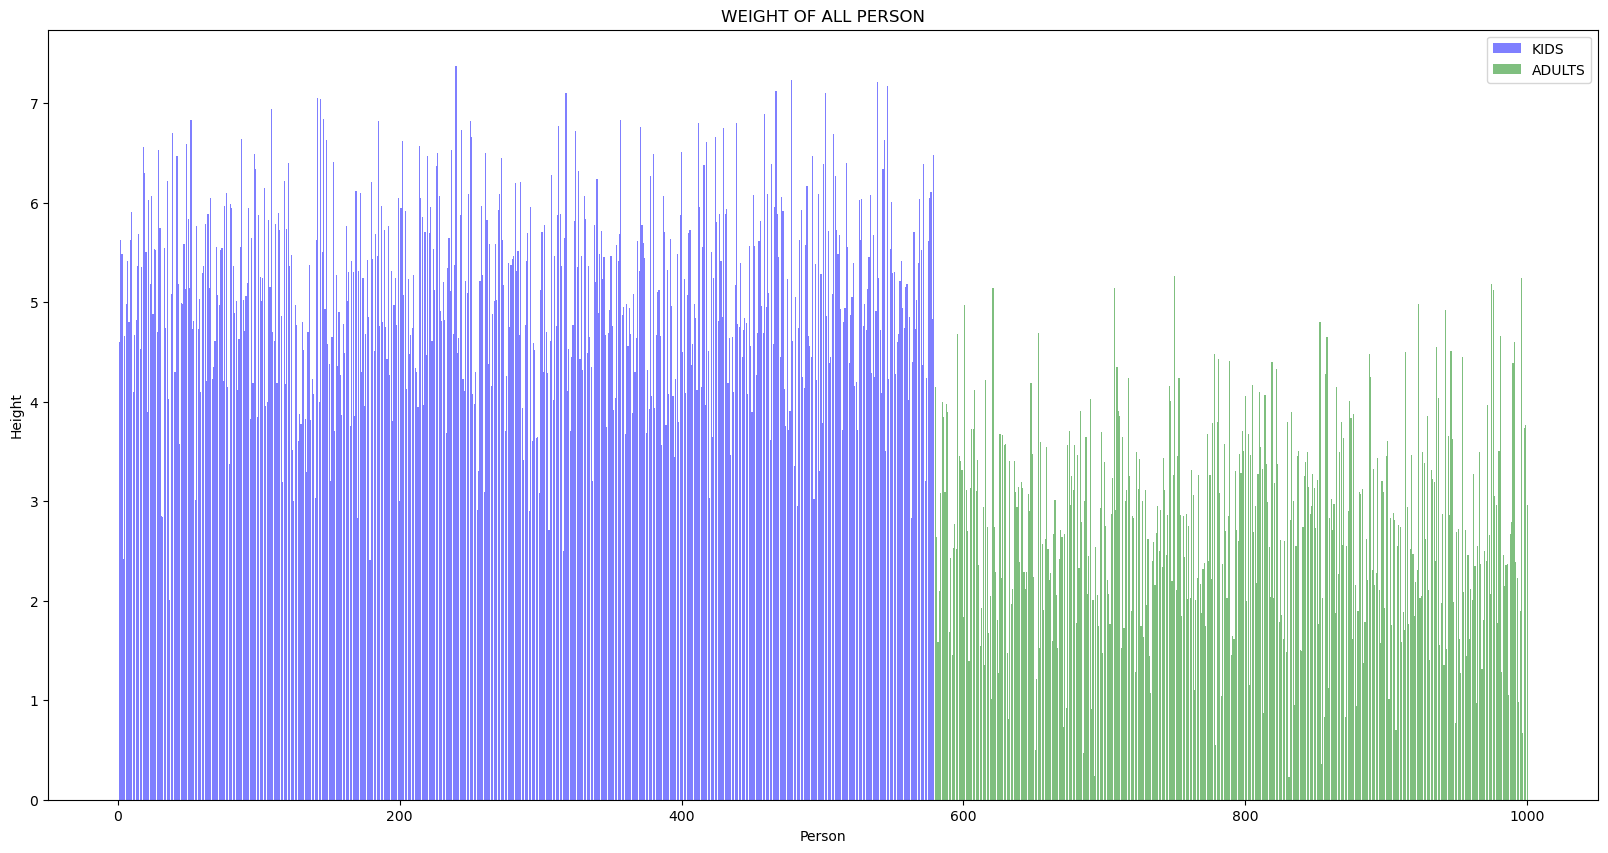

In [273]:
plt.figure(figsize=(20,10))
# plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
# plt.bar(heights_of_kid_gaussian)
# plt.legend(loc = 'upper right')
# plt.xticks(np.arange[0,])


# bar chart of names vs heights
# plt.bar([kid_names, kid_names], [heights_of_kid_gaussian, weights_of_kid_gaussian], color = ['blue', 'green'])
# plt.bar(kid_names, heights_of_kid_gaussian, color = 'blue', label = 'KIDS', alpha = 0.5)
# # plt.bar(kid_names, weights_of_kid_gaussian, color = 'green')
# plt.bar(adult_names, heights_of_adult_gaussian, color = 'green', label = 'ADULTS', alpha = 0.5)



plt.bar([
  i+1 for i in range(len(heights_of_adult_gaussian))
], heights_of_adult_gaussian, color = 'blue', label = 'KIDS', alpha = 0.5
)
plt.bar([
  i+1 for i in range(len(heights_of_adult_gaussian), len(heights_of_kid_gaussian)+len(heights_of_adult_gaussian))
], heights_of_kid_gaussian, color = 'green', label = 'ADULTS', alpha = 0.5
)


plt.legend(loc = 'upper right')
# plt.title('Histogram of Heights')
plt.xlabel('Person')
plt.ylabel('Height')
plt.title('WEIGHT OF ALL PERSON')
plt.show()

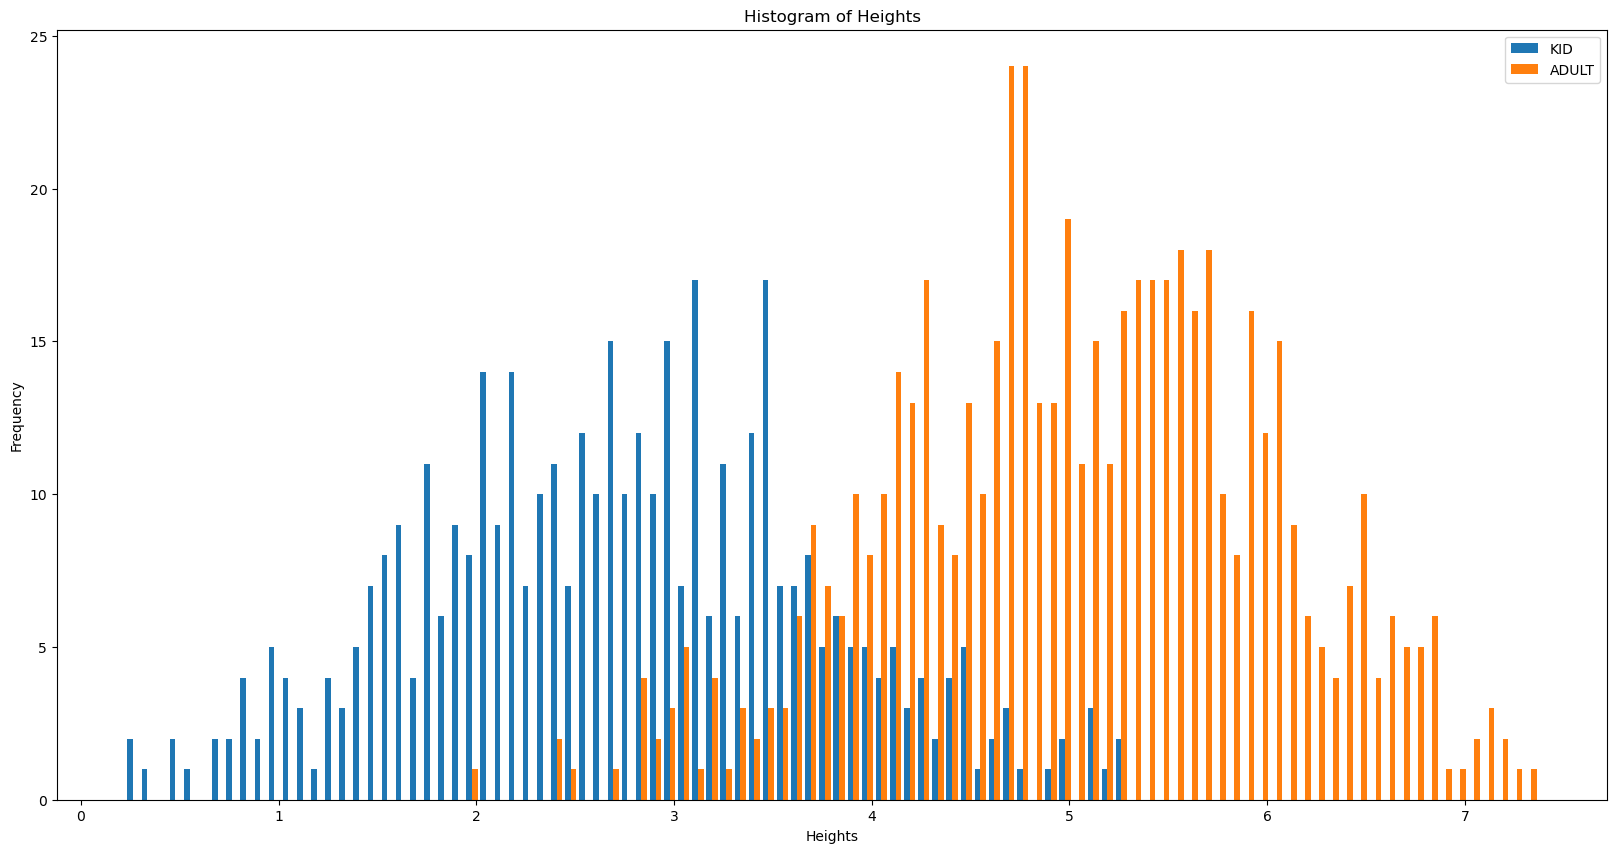

In [274]:
plt.figure(figsize=(20,10))
plt.hist([heights_of_kid_gaussian,heights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
plt.legend(loc = 'upper right')
# plt.xticks(np.arange[0,])


plt.title('Histogram of Heights')
plt.xlabel('Heights')
plt.ylabel('Frequency')
plt.show()




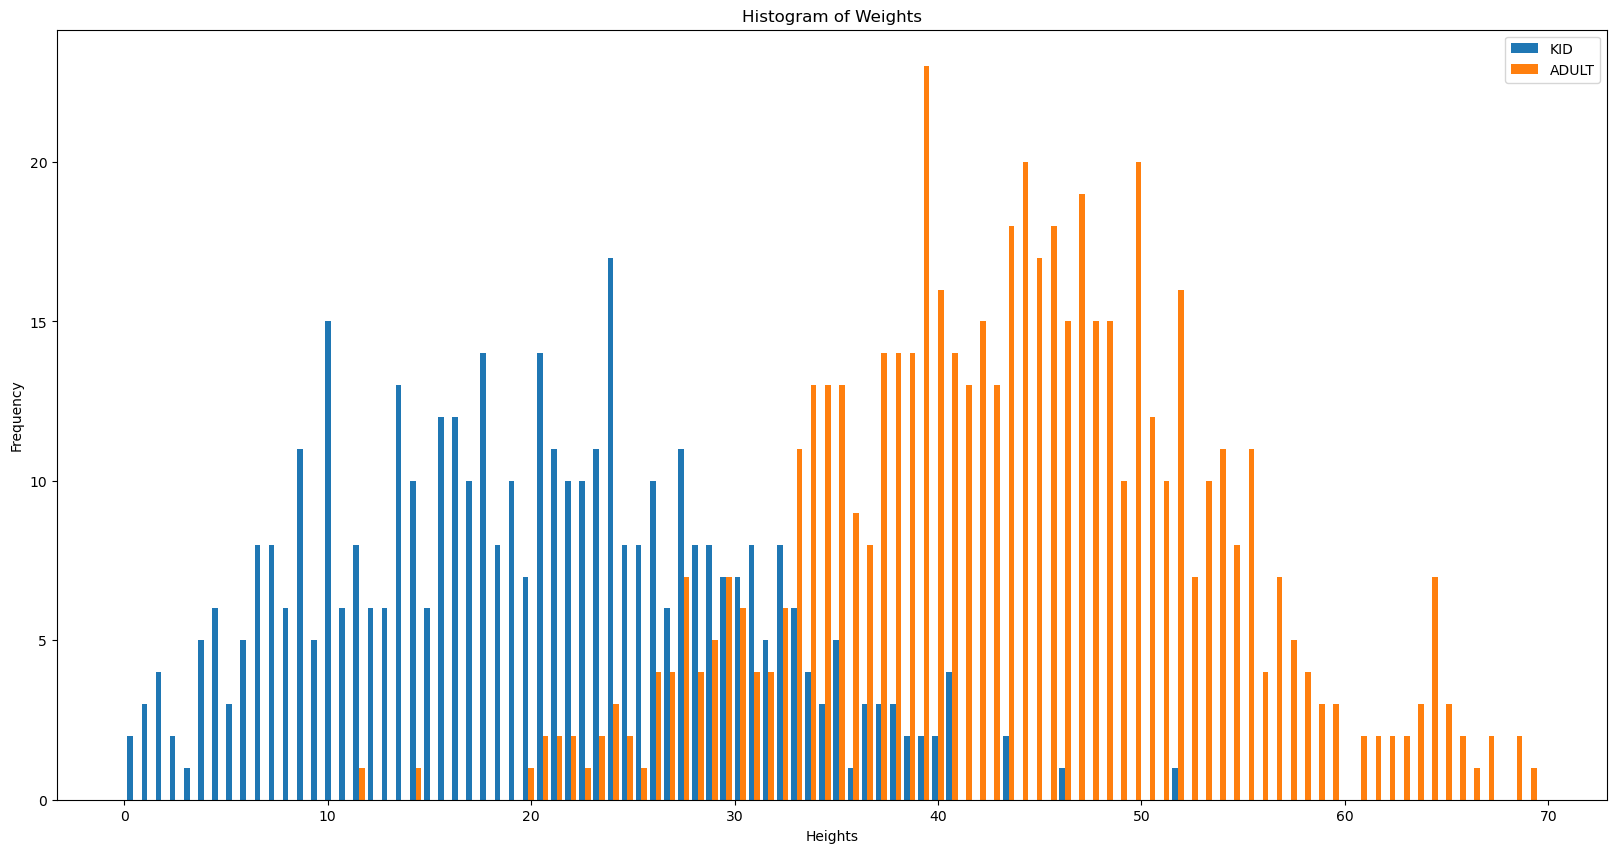

In [275]:
plt.figure(figsize=(20,10))
plt.hist([weights_of_kid_gaussian,weights_of_adult_gaussian], label=['KID','ADULT'], bins=100)
plt.legend(loc = 'upper right')
# plt.xticks(np.arange[0,])


plt.title('Histogram of Weights')
plt.xlabel('Heights')
plt.ylabel('Frequency')
plt.show()

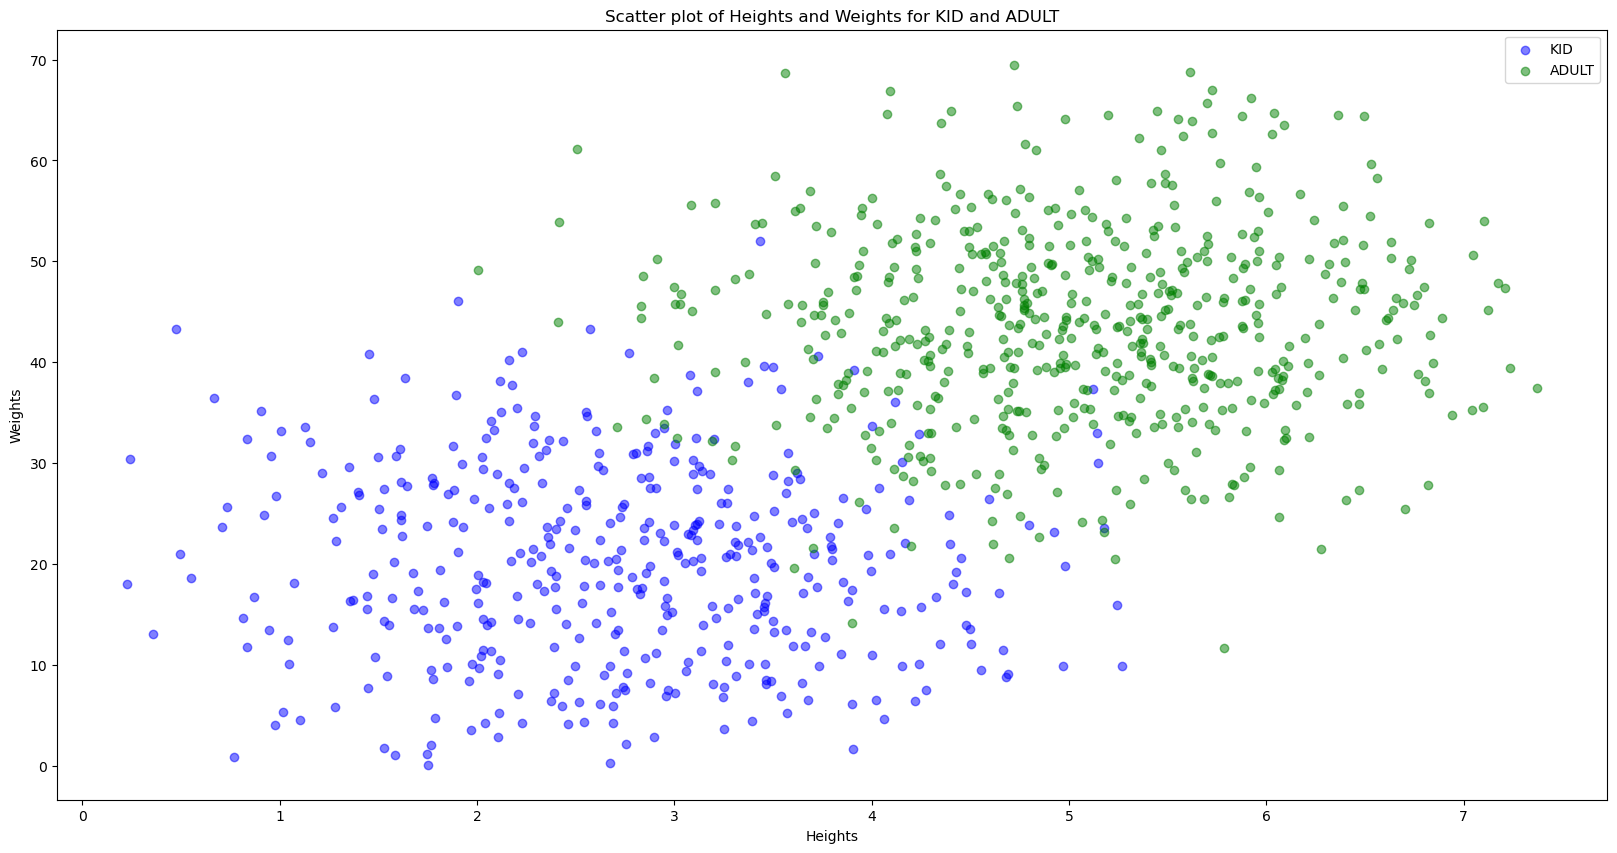

In [276]:
plt.figure(figsize=(20,10))

plt.scatter(heights_of_kid_gaussian, weights_of_kid_gaussian, color = 'blue', alpha=0.5, label = 'KID')

plt.scatter(heights_of_adult_gaussian, weights_of_adult_gaussian, color = 'green', alpha=0.5, label = 'ADULT')


plt.xlabel('Heights')
plt.ylabel('Weights')
# plt.xticks(np.arange(0,8.25,0.25))
# plt.yticks(np.arange(0,75,5))
plt.title('Scatter plot of Heights and Weights for KID and ADULT')
plt.legend(loc='upper right')
plt.show()


In [277]:
def gaussian_function(z: float, mean:float , std: float):
  pi = np.pi
  e = np.e
  return np.power(
    e, (-0.5) * (((z - mean)/std)**2)
  )/(std*(np.sqrt(2*pi)))



In [278]:
# np.power(2,3)

# gaussian_function(0,0,1) == 1/np.sqrt(np.pi * 2)

(b) Implement an agent that observes the 1000 samples generated in part (a) and computes the fraction $pK$ of kids. Observe that $pK$ is an estimate on $pKid$. Compute the mean and standard deviation of heights and weights for samples that are kids. These values $\mu'_{11},\sigma'_{11},\mu'_{12}$ and $\sigma'_{12}$ are the estimates for $\mu_{11},\sigma_{11},\mu_{12}$ and $\sigma_{12}$. Compute similar estimates $\mu'_{21},\sigma'_{21},\mu'_{22}$ and $\sigma'_{22}$ for $\mu_{21},\sigma_{21},\mu_{22}$ and $\sigma_{22}$.



(c) Implement an agent that classifies each sample generated in part (a) as kid or adult using the estimates computed in part (b) and Bayes' Rule. That is, the classification of a person with attributes $x=(x_1,x_2)$ into $adult$ or $kid$ is based on the values $pK \cdot f_{\mu'_{11},\sigma'_{11}}(x_1) f_{\mu'_{12},\sigma'_{12}}(x_2)$ and $(1-pK) \cdot f_{\mu'_{21},\sigma'_{21}}(x_1) f_{\mu'_{22},\sigma'_{22}}(x_2)$. Measure the accuracy of the classifier. Give the scatter plot of the 1000 samples (height in the X-axis and weight in the Y-axis) by coloring the correctly classified ones in one color and the others in another color. 





In [279]:


class Agent:
  def __init__(self, samples: list) -> None:

    # sample list is list of objects

    kid_list = [
      element for element in samples if isinstance(element, Kid)
    ]
    self.kid_list = kid_list
    adult_list = [
      element for element in samples if isinstance(element, Adult)
    ]
    self.adult_list = adult_list
    # print(kid_list)
    # print(adult_list)

    self.samples = samples

    countKid = 0
    for object in samples:
      if isinstance(object, Kid):
        countKid += 1

    self.pK = countKid/len(samples)
    # estimate on pKid

    self.mean_height_kid = np.mean([isinstance(x, Kid) and x.kid_height for x in kid_list])
    self.mean_height_adult = np.mean([isinstance(x, Adult) and x.adult_height for x in adult_list])
    self.mean_weight_kid = np.mean([isinstance(x, Kid) and x.kid_weight for x in kid_list])
    self.mean_weight_adult = np.mean([isinstance(x, Adult) and x.adult_weight for x in adult_list])


    # print([
    #   self.mean_height_kid,self.mean_height_adult, self.m
    # ])
    # print([isinstance(x, Kid) and x.kid_height for x in kid_list])
    


    self.std_height_kid = np.std([isinstance(x, Kid) and x.kid_height for x in kid_list])
    self.std_height_adult = np.std([isinstance(x, Adult) and x.adult_height for x in adult_list])
    self.std_weight_kid = np.std([isinstance(x, Kid) and x.kid_weight for x in kid_list])
    self.std_weight_adult = np.std([isinstance(x, Adult) and x.adult_weight for x in adult_list])



    # print([
    #   self.std_height_kid, self.std_height_adult, self.std_weight_kid, self.std_weight_adult
    # ])
    

  def naive_bayes_classifier(self):
    check_dictionary = dict()
    for element in self.samples:
      if isinstance(element, Kid):
        check_dictionary[element.kid_name] = (0,element)
        # 0 if Kid
      elif isinstance(element, Adult):
        check_dictionary[element.adult_name] = (1, element)
        # 1 if adult

    # lst_height_weight

    correct_count = 0
    correctly_classified_objects = []
    incorrectly_classified_objects = []

    pK = self.pK

    for element in self.samples:
      if isinstance(element, Kid):
        height = element.kid_height
        weight = element.kid_weight

        a = gaussian_function(height, self.mean_height_kid, self.std_height_kid)
        b = gaussian_function(weight, self.mean_weight_kid, self.std_weight_kid)
        c = gaussian_function(height, self.mean_height_adult, self.std_height_adult)
        d = gaussian_function(weight, self.mean_weight_adult, self.std_weight_adult)

        predict_kid = pK * a * b
        predict_adult = (1-pK) * c * d

        if predict_kid > predict_adult:
          # predicting kid as Kid
          correct_count += 1
          correctly_classified_objects.append(element)

        else:
          # predicting kid as adult
          incorrectly_classified_objects.append(element)
      
      elif isinstance(element, Adult):
        height = element.adult_height
        weight = element.adult_weight

        a = gaussian_function(height, self.mean_height_kid, self.std_height_kid)
        b = gaussian_function(weight, self.mean_weight_kid, self.std_weight_kid)
        c = gaussian_function(height, self.mean_height_adult, self.std_height_adult)
        d = gaussian_function(weight, self.mean_weight_adult, self.std_weight_adult)

        predict_kid = pK * a * b
        predict_adult = (1-pK) * c * d

        if predict_adult > predict_kid:
          # predicting adult as adult
          correct_count += 1
          correctly_classified_objects.append(element)

        else:
          # predicting adult as kid
          incorrectly_classified_objects.append(element)
    
    print(f'The accuracy of Naive Bayes Classifier is {correct_count/len(self.samples)}')

    plt.figure(figsize=(20,10))
    

    correctly_classified_heights = []
    correctly_classified_weights = []
    incorrectly_classified_heights = []
    incorrectly_classified_weights = []

    for element in correctly_classified_objects:
      if isinstance(element, Kid):
        correctly_classified_heights.append(element.kid_height)
        correctly_classified_weights.append(element.kid_weight)
      elif isinstance(element, Adult):
        correctly_classified_heights.append(element.adult_height)
        correctly_classified_weights.append(element.adult_weight)
    for element in incorrectly_classified_objects:
      if isinstance(element, Kid):
        incorrectly_classified_heights.append(element.kid_height)
        incorrectly_classified_weights.append(element.kid_weight)
      elif isinstance(element, Adult):
        incorrectly_classified_heights.append(element.adult_height)
        incorrectly_classified_weights.append(element.adult_weight)

    
    
    plt.figure(figsize=(20,10))

    plt.scatter(correctly_classified_heights, correctly_classified_weights, color = 'green', alpha=0.5, label = 'CORRECT')

    plt.scatter(incorrectly_classified_heights, incorrectly_classified_weights, color = 'red', alpha=0.5, label = 'INCORRECT')


    plt.xlabel('Heights')
    plt.ylabel('Weights')
    # plt.xticks(np.arange(0,8.25,0.25))
    # plt.yticks(np.arange(0,75,5))
    plt.title('Naive Bayes Classifier Scatter Plot')
    plt.legend(loc='upper right')
    plt.show()



The accuracy of Naive Bayes Classifier is 0.96


<Figure size 2000x1000 with 0 Axes>

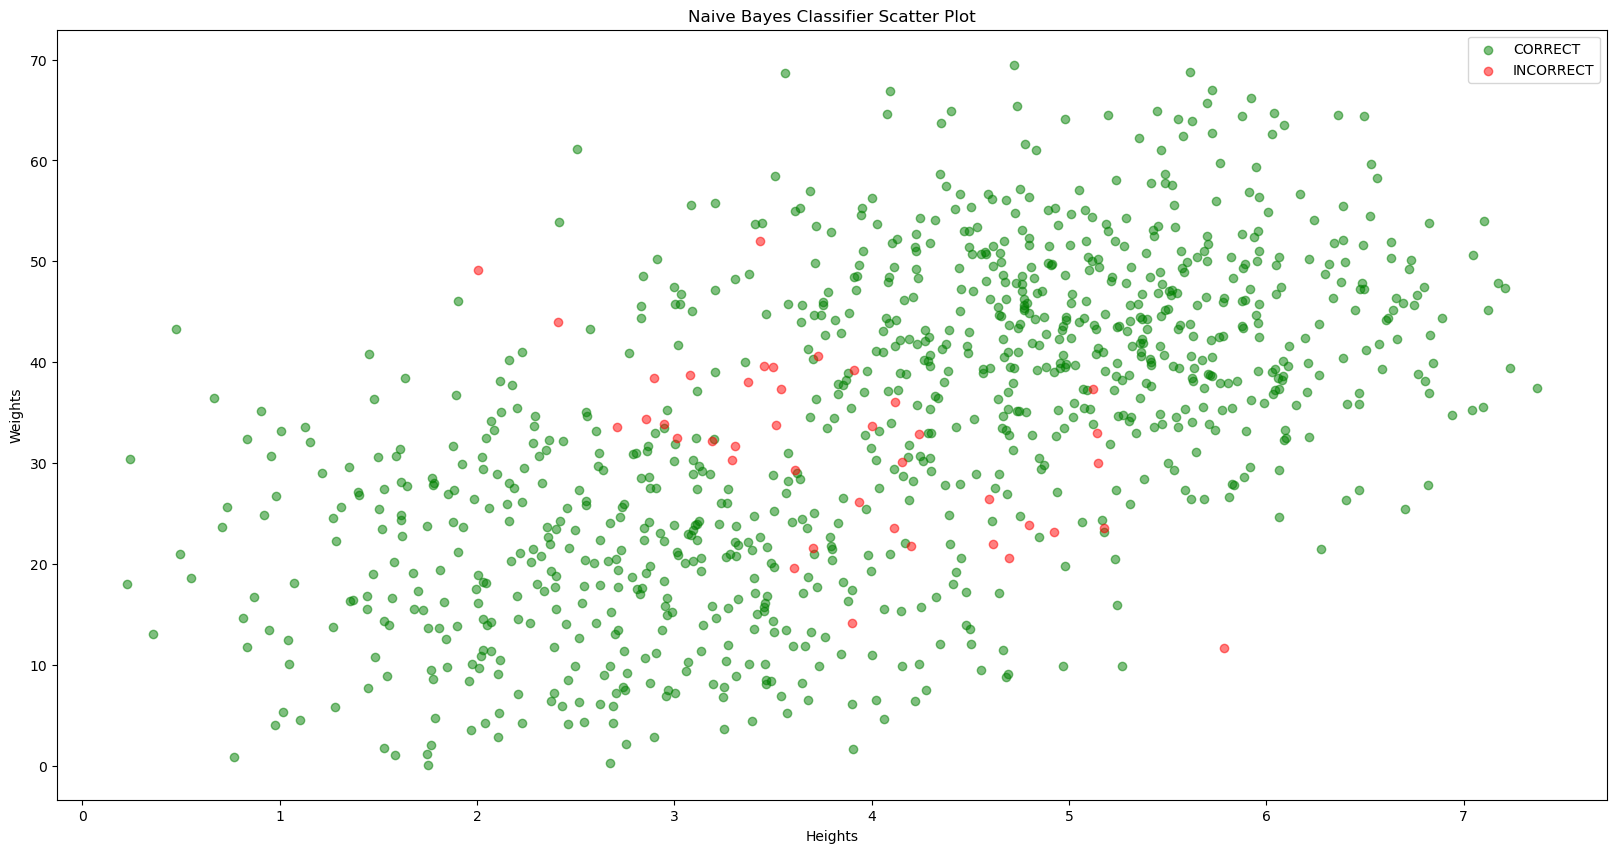

In [280]:
agent = Agent([*kid_objects_gaussian, *adult_objects_gaussian])
agent.naive_bayes_classifier()